In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [2]:
df = pd.read_csv('monthlyretailsales.csv', header=0, index_col=0, parse_dates=True)
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


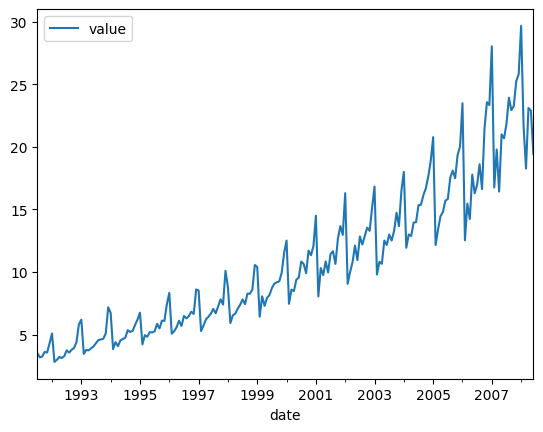

In [3]:
df.plot()
plt.show()

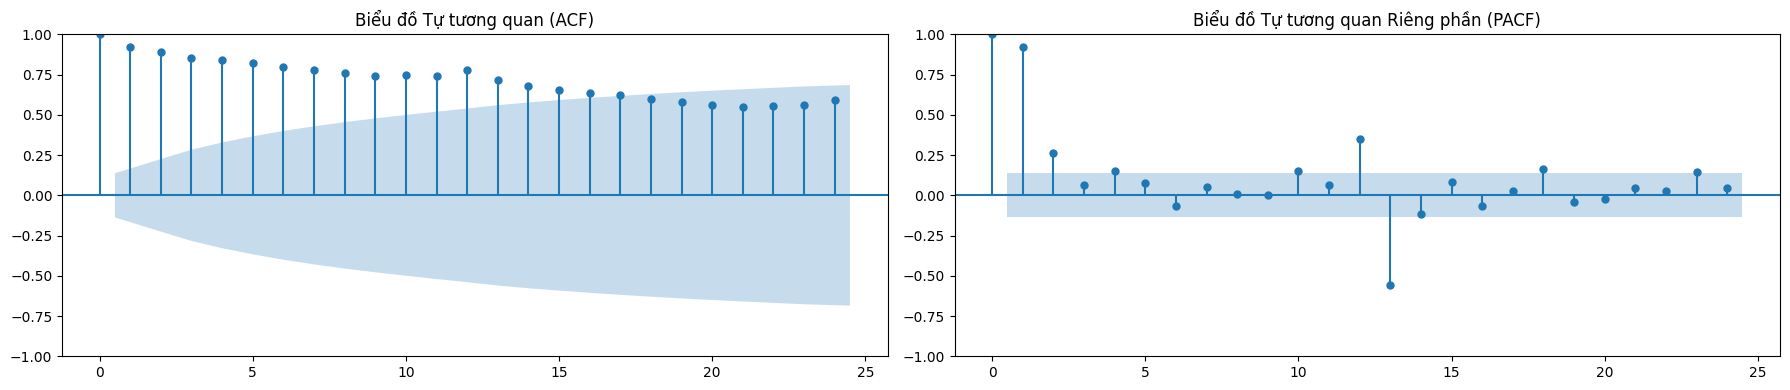

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(18, 4))

plot_acf(df, lags=24, ax=ax[0])
ax[0].set_title('Biểu đồ Tự tương quan (ACF)')
plot_pacf(df, lags=24,ax=ax[1])
ax[1].set_title('Biểu đồ Tự tương quan Riêng phần (PACF)')
plt.tight_layout()
plt.show()



In [5]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series, alpha=0.05):
    result = adfuller(series.dropna())
    return result[0], result[1]   # ADF statistic, p-value


In [6]:
import pandas as pd

def test_integration_order(series, max_d=5, alpha=0.05):
    temp = series.copy()
    
    for d in range(max_d + 1):
        stat, pvalue = adf_test(temp, alpha)
        
        print(f"d = {d}")
        print(f"  ADF statistic = {stat:.4f}")
        print(f"  p-value       = {pvalue:.4f}")
        
        if pvalue < alpha:
            print(f"→ Chuỗi DỪNG tại d = {d} (I({d}))")
            return d
        else:
            print("→ Chưa dừng\n")
        
        # sai phân cho vòng tiếp theo
        temp = temp.diff().dropna()
    
    print(f"Chuỗi chưa dừng đến d = {max_d}")
    return None


In [9]:
import pandas as pd

df = pd.read_csv("daily-minimum-temperatures.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

series = df['Temp']

test_integration_order(series, max_d=5)


d = 0
  ADF statistic = -4.4448
  p-value       = 0.0002
→ Chuỗi DỪNG tại d = 0 (I(0))


0